# **Trabajo Practico Numero 1**

*<strong>Alumnos:</strong> Guido Pauletti y Maria Agustina Burgos Pesqueira.*

**Antes que nada**:</br> para los ejercicios seran necesarias las librerias **numpy**, **scipy** y **matplotlib**, </br>por lo tanto, las importamos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

\
$\textbf{Ejercicio 1}$

Dada una matriz A $\in \mathbb R^{n \times n}$, retorna las dos matrices L y U de la descomposiciónn A = LU sin pivoteo. 
Si A tiene algún 0 en la diagonal, imprime un mensaje de error y devuelve las matrices In y A.

In [2]:
def descompLU(A):
    '''
    Calcula la descomposicion LU de una matriz
    ==========================================
    Parametro:
    ----------
    matriz A perteneciente a R^n*n
    
    Retorna:
    --------  
    Las dos matrices de descomposicion LU = A
    '''
    A = A.astype(np.float64) # para operar con mas precision

    n = A.shape[0] # obtengo la cantidad de filas y columnas de A (matriz cuadrada n*n)

    if not np.diag(A).all(): # all() chequea que todos los elementos de un array sean != 0
        print('Error: Hay por lo menos un cero en la diagonal')
        identidad = np.eye(n)
        return (identidad,A) # en caso de hallar un cero en la diagonal, devuelvo IA

    # el caso base es una matriz A de 1 elemento, donde LU = 1A 
    if n == 1: 
        L = 1
        U = A[0,0]
        return (L, U)

    # defino una matriz U, de la misma forma que A,
    # y voy dandole valores acorde a las ecuaciones dadas en la consigna
    U = np.zeros_like(A) 

    # primer fila de U es igual a primer fila de A
    # osea u_11 = a_11 y U_12 = A_12
    U[0,:] = A[0,:]

    # se hace lo mismo con L
    L = np.eye(n)
    L[1:, 0] = A[1:,0] / U[0,0] # L_21 = A_21 / u_11

    # uso que L_22*U_22 = A_22 - L_21*U_12
    # para armar con esa ecuacion una matriz, 
    # parametro de la proxima llamada recursiva
    matriz_recursiva = A[1:,1:] - L[1:, 0].reshape(n-1,1)@U[0,1:].reshape(1,n-1)

    L_22, U_22 = descompLU(matriz_recursiva) # llamada recursiva

    # luego de la recursion se completan las matrices resultantes
    L[1:,1:] = L_22 
    U[1:,1:] = U_22 
    
    return (L,U)

\
$\textbf{Ejercicio 3}$

Dada una matriz A cuadrada de tamaño $n \times n$ y un vector b de tamaño n, devuelve la solución x del sistema Ax = b calculando primero
la descomposición LU y resolviendo luego los sistemas Ly = b y Ux = y.

In [3]:
def resolverLU(A, b):
    '''
    Resuelve un sistema Ax = b
    ==========================
    
    Parametros:
    ----------
    * matriz A n*n
    * vector b de n elementos

    Retorna:
    --------
    x vector solucion de la ecuación Ax = b
    '''

    #Obtenemos L y U haciendo uso del ejercicio 1
    L, U = descompLU(A)

    #Resuelvo la ecuacion Ly = b especificada en la consigna
    y = sp.linalg.solve_triangular(L, b, lower=True)

    #Con (y) puedo obtener la solucion a la ecuación Ux = y
    x = sp.linalg.solve_triangular(U, y, lower=False)

    return x


## Ejercicio 4

Probamos la función resolverLU del ejercicio 3 tomando una matriz A $\in \mathbb R^{10 \times 10}$ de
números aleatorios en [−1, 1) y un vector b $\in \mathbb R^{10}$ de números aleatorios en [−1, 1). $\\$
Después, calculamos el error relativo en norma 2: e = $\frac{∥A\bar{x}−b∥_2}{∥b∥_2}$ para $\bar{x}$ la solución calculada.

In [ ]:
def generar_random(n, matrix=True):
    '''
    Genera matrices y vectores al azar
    ==================================

    Parametros:
    ----------

    * n: Numero entero
    * matrix: Booleano, en caso de ser True la funcion devuelve una matriz de n*n
            con numeros aleatorios pertenecientes a [-1,1).
            En caso de ser False, la funcion devuelve un vector de n elementos,
            todos pertenecientes a [-1,1). Valor por defecto = True

    Retorna:
    --------
    Matriz o vector con numeros random pertenecientes a [-1,1)
    '''

    if matrix:
        # matriz de tamaño n*n de números aleatorios en [0,1)
        A_positiva = np.random.rand(n,n)
        # matriz de tamaño n*n de números aleatorios en [-1,0)
        A_negativa = np.random.rand(n,n) - np.ones((n,n))
        # matriz de tamaño n*n de números aleatorios en [-1,1)
        return A_positiva + A_negativa
        
    else:
        # Genero vector aleatorio con elementos pertenecientes a [-1,1)
        x_positivo = np.random.rand(n)
        x_negativo = np.random.rand(n) - np.ones(n)
        return x_positivo + x_negativo

Obtenemos la matriz A y el vector b

In [4]:
A = generar_random(10)
b = generar_random(10,matrix=False) 

Obtenemos la solucion de la ecuacion Ax = b

In [5]:
x = resolverLU(A,b)

In [6]:
def error_relativo_b (A,x,b):
    '''
    Calcula el error relativo de Ax=b en cuanto a b
    ===============================================

    Parametros:
    -----------
    * A: matriz n*n en reales
    * x: vector columna con n elementos
    * b: resultado del producto Ax

    Retorna:
    --------
    El logaritmo natural del error relativo al calcular b
    '''
    e = np.linalg.norm(A@x-b, ord=2)/np.linalg.norm(b, ord=2)
    return(np.log(e))

Finalmente calculamos el error relativo pedido

In [7]:
error_relativo_b(A,x,b)

3.989915815287618e-14

\
$\textbf{Ejercicio 5}$

Dada una matriz A de tamaño $n \times n$ inversible, calcula la inversa de A.

In [8]:
def inversa(A):
    '''
    Calcula la inversa de una matriz
    ================================

    Parametro:
    ----------
    matriz cuadrada A

    Retorna:
    --------
    matriz inversa de A
    '''
    L, U = descompLU(A) # obtenemos la descomposicion LU de A
    
    I = np.eye(len(A)) # matriz identidad del tamaño de A.
    
    # creamos una matriz Ainversa de 0s del mismo tamaño que A.
    Ainversa = np.zeros((len(A),len(A[0])))
    # cada fila de Ainversa es igual a Aei.
    i = 0
    while i < len(I):
        # resolvemos Ly=ei
        y = sp.linalg.solve_triangular(L,I[i], lower=True)
        # resolvemos Ux=y
        x = sp.linalg.solve_triangular(U,y, lower=False)
        Ainversa[i] = x
        i = i+1
    # devuelve la traspuesta de Ainversa (para que Aei sea cada columna).
    return(np.transpose(Ainversa))
        


\
$\textbf{Ejercicio 6}$

Probamos la función inversa del ejercicio 5 tomando una matriz A $\in \mathbb R^{10 \times 10}$ de
números aleatorios en [−1, 1). $\\$
Después, calculamos $A^{−1}A$ (siendo $A^{−1}$ la matriz retornada por la función inversa) y el error en norma Frobenius: $∥A^{−1}A − I∥_F$.

In [9]:
# Obtengo una matriz generada aleatoriamente
Al = generar_random(10)

# Obtengo la matriz inversa usando la funcion del Ej. 5
inv_Al = inversa(Al)

# Obtengo el producto entre ambas matrices obtenidas
producto = np.dot(inv_Al, Al)

# Calculo el error en norma Frobenius
diferencia = producto - np.eye(len(producto)) #Obtengo la matriz para calcularle la norma Frobenius

error_frobenius = np.linalg.norm(diferencia, 'fro')
# Calculo el radicando: sumo los cuadrados de la diagonal de la matriz diferencia

error_frobenius

4.56678335174557e-15

\
$\textbf{Ejercicio 7}$

**Nota:** Usamos las funciones del ejercicio 4 para no repetir codigo, ademas creamos otras funciones auxiliares $error\_relativo\_x$, $error\_matriz\_i$, que seran usadas en la funcion principal $obtener\_vectores$

**Observacion:** Con el mismo proposito de no repetir codigo, optamos por incluir tanto el ejercicio 8 como el 9 dentro de las funciones. Todo esta explicado con comentarios en el codigo.

In [10]:
def error_relativo_x (xn,x):
    '''
    Calcula el error relativo de Ax=b en cuanto a la solucion hallada contra la solucion real
    ===============================================

    Parametros:
    -----------
    * xn: solucion hallada
    * x: solucion real

    Retorna:
    --------
    El logaritmo natural del error relativo al calcular x
    '''
    e = np.linalg.norm(xn-x, ord=2)/np.linalg.norm(x, ord=2)
    return(np.log(e))

In [12]:
def error_matriz_i(i, ej_8 = False, ej_9 = False):
    '''
    Parametro:
    ----------
    * i: Numero entero

    Retorna:
    --------
    Tupla conteniendo el error relativo de la solucion al sistema Ax = b (generado aleatoriamente)
    , al resolverlo de dos maneras distintas.
    Siendo A una matriz cuadrada en reales con i filas, y b un vector en reales con i elementos
            
    '''
    ln_error_relativo_x1 = 0
    ln_error_relativo_x2 = 0

    for n in range(10):

        A = generar_random(i)

        x = generar_random(i, matrix=False)

        # Defino b
        b = np.dot(A,x)

        if ej_9:
            # Resolvemos el sistema con los metodos especificados en la consigna
            x1 = np.linalg.solve(A,b)
            x2 = np.linalg.inv(A)@b
        else:
            # Calculo la solucion al sistema Ax = b usando la funcion del Ejercicio 3
            x1 = resolverLU(A,b)

            # Calculo x2 = inv(A)b
            x2 = np.dot(inversa(A),b)

        if ej_8: # Caso en el que busco el error relativo en el valor de x (Ejercicio 8)
            # Obtengo el error relativo
            ln_error_relativo_x1 = ln_error_relativo_x1 + error_relativo_x(x1,x)
            # Obtengo el error relativo
            ln_error_relativo_x2 = ln_error_relativo_x2 + error_relativo_x(x2,x)      
        else: # Caso en el que busco el error relativo en el valor de b (Ejercicio 7)
            # Obtengo el error relativo
            ln_error_relativo_x1 = ln_error_relativo_x1 + error_relativo_b(A,x1,b)
            # Obtengo el error relativo
            ln_error_relativo_x2 = ln_error_relativo_x2 + error_relativo_b(A,x2,b)

    # Devuelvo una tupla conteniendo ambos errores relativos
    return (ln_error_relativo_x1,ln_error_relativo_x2)


In [13]:
def obtener_vectores(ej_8 = False, ej_9 = False):
    '''
    Parametros:
    ----------
    * ej_8: Especifica si se está llamando a la funcion para resolver el ejercicio 8, False por default
    * ej_9: Especifica si se está llamando a la funcion para resolver el ejercicio 9, False por default

    Retorna:
    --------
    Dos vectores v1 y v2 con 190 elementos cada uno, conteniendo la suma de errores para cada
    matriz de n*n con 10 <= n <= 200
    '''
    # Inicializo dos listas vacias para luego llenarlas con los elementos de los vectores finales
    vector1, vector2 = [], []

    for i in range(10,201):

        # Obtengo la suma de los logaritmos de los errores relativos
        sumar1, sumar2 = error_matriz_i(i,ej_8, ej_9)         

        # Agrego los errores relativos en las listas correspondientes
        vector1.append(sumar1) 
        vector2.append(sumar2)

    # Creo los vectores con los elementos de las listas
    v1 = np.array(vector1)
    v2 = np.array(vector2)

    n = np.arange(10,len(v1))
    plt.plot(n,v1[10:], label='Resolver (LU)x=b')
    plt.plot(n,v2[10:], label='x = Inversa(A)*b')
    plt.title('Errores relativos ||Ax-b||/||b||')
    plt.legend()
    plt.show()

    return (v1,v2)


Una vez que todo esta definido, solo hace falta un llamado a la funcion $obtener\_vectores$

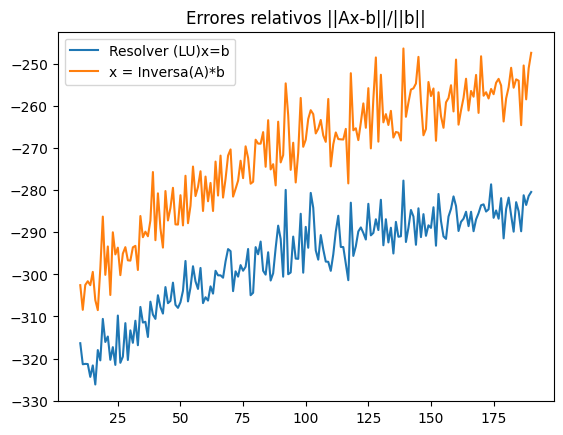

(array([-339.42733124, -334.20925069, -334.18424158, -334.30199623,
        -333.5100065 , -327.88597716, -327.16745908, -330.05091856,
        -322.17983681, -326.72800709, -316.35429689, -321.34660942,
        -321.25894779, -321.2984267 , -324.35234935, -321.62258995,
        -326.15089632, -317.9822249 , -320.42524548, -310.5806725 ,
        -316.06092246, -314.76113063, -320.29200865, -317.28873555,
        -321.50320264, -309.78403576, -321.00796559, -319.54494848,
        -311.585033  , -320.33658378, -313.30546978, -316.25589277,
        -311.01524549, -316.83213982, -307.73794559, -311.44845889,
        -311.26016389, -314.86855201, -306.49432699, -309.56090644,
        -310.57641754, -304.96496547, -307.76280584, -309.31699447,
        -303.02321977, -306.85317153, -306.3129626 , -301.9737462 ,
        -307.24358575, -307.95553531, -306.62222424, -303.89819036,
        -296.82706091, -306.42676967, -303.15637327, -298.07891432,
        -301.66557228, -303.46233531, -298.48097

In [14]:
obtener_vectores()

**Conclusiones:**

Teniendo en cuenta que el logaritmo natural de un número es mas negativo cuanto mas ceracano a 0 sea este, y mirando el gráfico, podemos ver que la suma de los errores relativos con el método LU es menor que con el método de la inversa.

Asimismo, obervamos que si bien esta tendencia se mantiene a lo largo de todo el gráfico, el error para ambos métodos y la diferencia entre los errores va aumentando junto con el tamaño de la dimension.

Esto último se debe a que el error del método de la inversa aumenta más con el tamaño de la dimensión que el método LU.

Finalmente, notamos que si bien se puede ver una tendencia, los métodos no son muy precisos (hay "saltos" a lo largo de todo el gráfico).

\
$\textbf{Ejercicio 8}$

Repetimos todo el experimento del Ejercicio 7 pero midiendo los errores relativos entre las soluciones halladas y la solución original: $\frac{∥x_i−x∥_2}{∥x∥_2}$.

\
Solo necesitamos decirle a la funcion que resolvemos el ejercicio 8

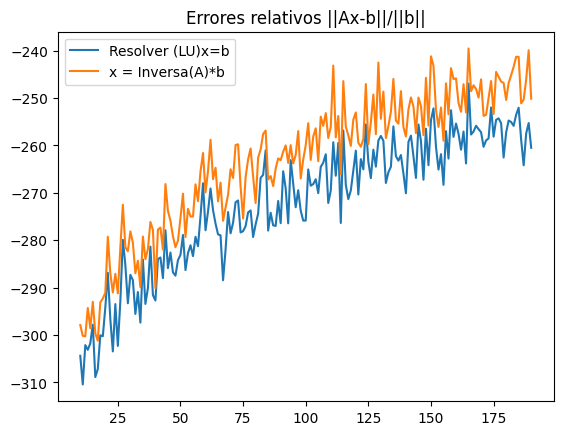

(array([-328.27173779, -324.27840228, -314.5395829 , -323.60429426,
        -316.16524519, -316.39201579, -317.47982718, -315.91799607,
        -312.25692084, -313.9628496 , -304.37937156, -310.43284928,
        -302.12512127, -303.12657016, -301.76578006, -297.81769596,
        -308.87892837, -307.16244237, -300.0555454 , -300.26307401,
        -294.19571044, -286.87432054, -296.64646865, -303.45724398,
        -293.47545677, -302.30219202, -292.81670764, -279.92387826,
        -285.25196606, -293.30269443, -287.29598736, -288.41059476,
        -295.55430336, -290.92848571, -297.3842447 , -284.0731679 ,
        -293.44138962, -290.1318838 , -281.35116664, -291.57905125,
        -292.71966461, -283.97509201, -283.64224148, -287.99072003,
        -277.90706477, -285.89418173, -282.6038644 , -286.77342887,
        -287.47659219, -284.1998722 , -283.09948726, -278.88751869,
        -286.3009977 , -282.72725644, -281.06090137, -283.36326457,
        -279.27341134, -281.28096879, -274.93277

In [15]:
obtener_vectores(ej_8=True)

**Conclusiones:**

Comparando este gráfico con el del ejercicio 7, podemos ver tres tendencias que se mantienen:

        -Los errores van aumentando junto con el tamaño de la dimensión.

        -El método LU tiene menos error que el de la inversa.
        
        -Los métodos no son muy precisos (hay "saltos" a lo largo de todo el gráfico y 
        pareciera que el método LU perdió precisión).

Sin embargo, la magnitud de ambos errores incrementó y la diferencia entre ellos es mucho más chica: Si comparamos los valores del eje "y" podemos concluir que el método LU fue el que más aumentó su error.

\
$\textbf{Ejercicio 9}$

Repetimos los experimentos del Ejercicio 7 y 8 pero utilizando los comandos np.linalg.solve y np.linalg.inv de numpy en lugar de las funciones resolverLU e inversa.

\
Repetimos experimento del ejercicio 7

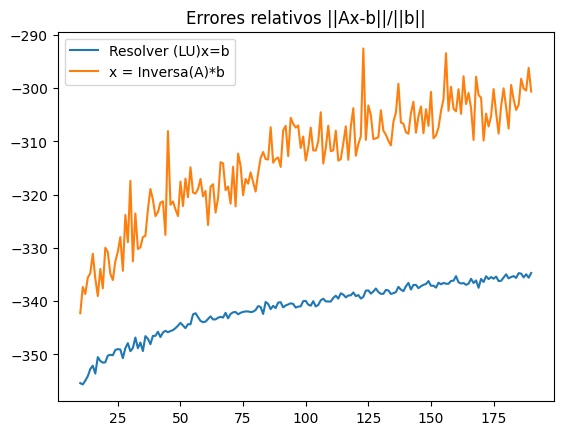

(array([-356.5355957 , -357.34779131, -358.76767005, -358.82769521,
        -357.45538311, -357.03242637, -355.00109371, -354.07330976,
        -356.01074787, -355.10318697, -355.37682164, -355.63235182,
        -354.9074876 , -354.08088402, -352.73250982, -352.10772455,
        -353.587052  , -350.49248964, -351.22533707, -351.53095831,
        -351.46873114, -350.22394859, -350.06287244, -350.13816359,
        -349.15265935, -348.99085022, -349.07223477, -350.68884395,
        -348.81003695, -347.87690521, -349.37968164, -348.78061719,
        -346.82220426, -348.80939489, -347.76354939, -349.36195544,
        -346.55586694, -347.03860187, -348.07604455, -346.51309596,
        -346.50499235, -345.7329725 , -346.72826591, -345.8878104 ,
        -345.55676501, -345.82545142, -345.60078617, -345.43313972,
        -345.06153165, -344.59448509, -344.06715986, -344.56103574,
        -345.05906133, -344.30649569, -344.3407138 , -342.47757054,
        -342.25482741, -342.97625313, -343.70263

In [16]:
obtener_vectores(ej_9=True)

**Conclusiones:**

Si comparamos con el gráfico del ejercicio 7, podemos notar que ambas tendencias se mantienen (menor error el método de LU y ambos errores aumentan con la dimensión) pero en este gráfico hay menos error en ambos métodos y la distancia entre los errores es mayor.

Es decir, el método de la inversa tiene un error más considerable que el de LU usando np.linalg.inv y np.linag.solve respectivamente, pero estos tienen menos error que usar las funciones resolverLU e inversa (se puede ver comparando los ejes "y" de los dos gráficos).

Asimismo, el error del método de la inversa aumenta más con el tamaño de la dimensión que el método LU que si bien aumenta, lo hace de a poco.

Finalmente, mientras el método de la inversa sigue con el mismo grado de precisión, el método LU es mucho más preciso (los saltos disminuyeron significativamente en el gráfico).

<hr>

Ahora repetimos el experimento del ejercicio 8

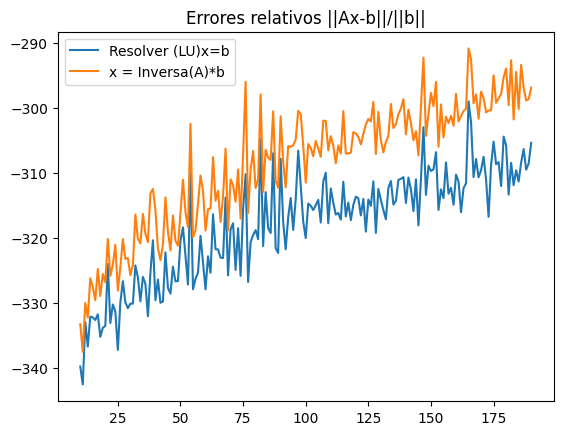

(array([-348.54113328, -342.33082738, -342.83038135, -344.75860858,
        -341.61823149, -342.09461578, -335.34720733, -334.12718887,
        -340.94394087, -338.28285229, -339.82469639, -342.59078242,
        -332.99217764, -336.75289352, -332.12104932, -332.26408576,
        -332.65872606, -331.78402524, -335.25916936, -333.86078424,
        -333.55901503, -324.02918141, -333.13225123, -330.25748181,
        -331.35935124, -337.26923045, -329.94742911, -326.67945862,
        -329.91657699, -330.83450777, -330.13473255, -330.14015644,
        -324.25045116, -326.07117007, -329.78304546, -326.02337032,
        -327.07348273, -332.08077524, -325.39298358, -320.37277368,
        -329.62020883, -326.41685102, -329.99959346, -329.8027214 ,
        -322.24355402, -327.72395475, -328.58679121, -324.43786227,
        -326.70419055, -326.65365978, -320.43239426, -318.38141044,
        -322.72025262, -327.18344147, -310.0708701 , -327.91503639,
        -326.32733519, -325.36485246, -319.68886

In [17]:
obtener_vectores(ej_8=True, ej_9=True)

**Conclusiones:**

Comparando con el gráfico del ejercicio 8, podemos notar que las tres tendencias se mantienen (menor error el método de LU, ambos errores aumentan con la dimensión y falta de precisión).

Sin embargo, en este gráfico hay menos error en ambos métodos y la distancia entre los errores a medida que aumenta la dimensión es mayor.

Esto último se debe a que el error del método de la inversa aumenta más con el tamaño de la dimensión que el error del método LU.

Si comparamos con el primer gráfico de este ejercicio, podemos ver un comportamiento análogo al que observamos al comparar los graficos del ejercicio 8 y 7.

\
$\textbf{Ejercicio 10}$

**Primero** armo la matriz A $\in \mathbb R^{n \times n}$ definida como aij = $ \frac{1}{1+i+j}$

In [53]:
A_ij = np.zeros(shape=(20,20))

for i in range(20):
    for j in range(20):
        A_ij[i,j] = 1/(1+i+j)

A la vez que vamos guardando el error relativo de las submatrices A[1:n,1:n], tambien vamos calculando su numero de condicion

In [54]:
v1, v2 = [], []
condicionales = []

for n in range(2,21):

    # armamos la submatriz
    a_ij = A_ij[:n,:n]

    # definimos los errores relativos de ambos metodos para ir sumando los resultados
    error_relativo_1 = 0
    error_relativo_2 = 0

    for m in range(10):
        # defino b para tener un sistema a resolver
        b = np.random.rand(n)

        # obtenemos las soluciones del sistema por dos metodos distintos
        x1 = resolverLU(a_ij,b)
        x2 = np.dot(inversa(a_ij),b)

        # vuelvemos a usar la funcion definida en el ejercicio 4
        error_relativo_1 = error_relativo_1 + error_relativo_b(a_ij,x1,b)
        error_relativo_2 = error_relativo_1 + error_relativo_b(a_ij,x2,b)
    
    # agregamos los errores obtenidos a los vectores que seran retornados
    v1.append(error_relativo_1)
    v2.append(error_relativo_2)

    # calculamos y guardamos el condicional de a_ij para usarlo como referencia
    ln_cond_a_ij = np.log(np.linalg.cond(a_ij, p=2))
    condicionales.append(ln_cond_a_ij)

print(f'vector 1:\n{v1}\nvector 2:\n{v2}')    

C:\Users\guido\AppData\Local\Temp\ipykernel_17452\1178939439.py:3: RuntimeWarning: divide by zero encountered in log
  return(np.log(e))


vector 1:
[-inf, -339.2944022012368, -307.12274451998957, -272.0751476727381, -239.7386716486393, -208.32272743501224, -181.61242171130348, -140.54613634370403, -104.28198150500035, -76.97009071903938, -34.517014208344776, -11.164426931767256, -3.9321379995728103, -4.808354300829747, 11.271579796049178, 6.396366384942838, 12.194626162283352, 8.817198690589247, 12.34058961950266]
vector 2:
[-inf, -371.84620304307913, -336.45532181050316, -298.52666518924946, -264.5131595353598, -227.82673374154018, -198.06163262389722, -153.1233251418315, -114.74553709818541, -83.7588449692822, -38.811715933148676, -10.960377046696241, -2.4013621656660273, -5.4604361555680985, 12.715029384036484, 7.0589244320502385, 13.945838976485238, 10.403619327973264, 13.73344117183945]


\
Graficamos

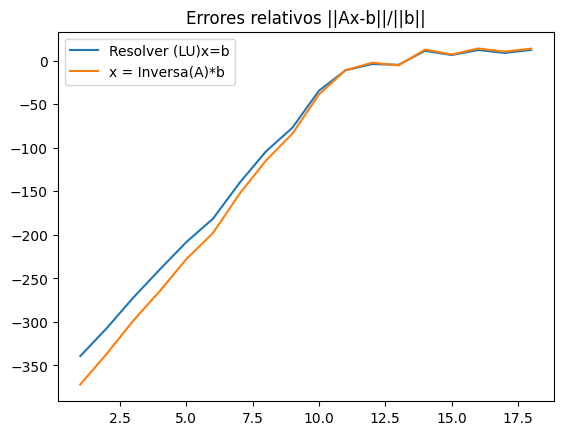

In [55]:
n = np.arange(len(v1))
plt.plot(n,v1[:], label='Resolver (LU)x=b')
plt.plot(n,v2[:], label='x = Inversa(A)*b')
plt.title('Errores relativos ||Ax-b||/||b||')
plt.legend()
plt.show()

\
Graficamos el error relativo en el eje x contra el logaritmo natural del condicional de A, para ver si encontramos alguna relacion.

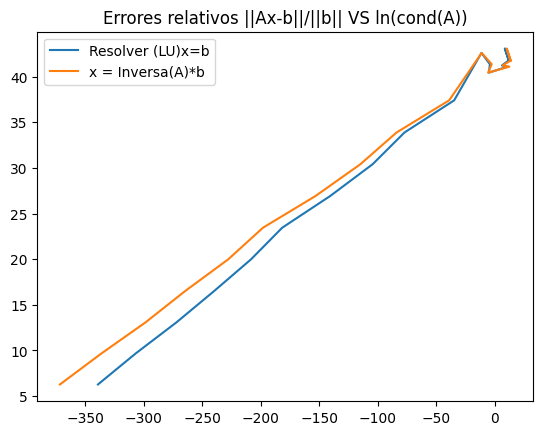

In [56]:
plt.clf()
plt.plot(v1[:],condicionales, label='Resolver (LU)x=b')
plt.plot(v2[:],condicionales, label='x = Inversa(A)*b')
plt.title('Errores relativos ||Ax-b||/||b|| VS ln(cond(A))')
plt.legend()
plt.show()

**Conclusiones:**

El número de condición nos da una medida de cuán mala es una matriz en cuanto a la propagación de los errores relativos. Si este número es grande se dice que la matriz está “mal condicionada”.

Cuando los problemas están bien condicionados tenemos esperanza de resolverlos con precisión siempre que nuestro algoritmo no incremente desproporcionadamente los errores inherentes a los datos.

En ambos gráficos podemos ver que el número de condición crece junto con la dimensión, con un pico en las matrices de 13x13.

Es decir, si bien el número de condición va aumentando, a partir de las matrices de 12x12 el número es muy grande, y por lo tanto hay mucha propagación de errores, con lo cual no vamos a poder resolver ningún problema con precisión, más alla del algoritmo en cuestión.

<hr>

\
$\textbf{CONCLUSIONES FINALES.}$

Conclusiones sobre la manera de realizar el TP:

        -Es muy importante optimizar el tiempo de ejecución de una función: En un principio habiamos planteado el ejercicio 
        1 de otra manera, que incluia dos ciclos. A la hora de hacer el ejercicio 7 nos encontramos con que esta función
        tardaba mucho (más de 30 minutos) en devolver lo pedido. Entonces, si bien la funcion era correcta (la habiamos 
        probado y daba bien), no nos servia para realizar el TP por el tiempo que tardaba y tuvimos que reescribirla.
        
        -Es muy útil hacer funciones generales: A partir del ejercicio 7 tuvimos que repetir muchas partes del código, 
        entonces decidimos hacer funciones que realizaran de manera general lo que necesitabamos para después aplicarlo en 
        cada ejercicio que lo necesitara.
        
Conclusiones sobre los ejercicios del tp:

        -En los ejercicios 4 y 6 probamos las funciones implementadas en los ejercicios 1,3 y 5 y vimos que los errores eran 
        chicos.
        
        -A partir del ejercicio 7 hasta el 9 pudimos chequear bien la propagación de errores de nuestras funciones:
        
            Vimos que en todos los casos (con nuestras funciones y las de la libera numpy) el método LU tuvo menos errores 
            que el método de la inversa, es decir, la máquina tiene menos error cuando descompone una matriz A en L y U, 
            que cuando calcula su inversa. Entonces, si tenemos A y x, lo mejor para calcular b (Ax=b) es el método LU y 
            en particular, usar np.linalg.solve que, como vimos, es el más preciso y el que menos error tiene.
            Esto se mantiene para calcular x, aunque con un poco más de error y menos precisión, pero sigue siendo la mejor
            opción.
            
            Más alla de esto, siempre hay que tener en cuenta que los errores aumentan con la dimensión, por lo que, a la 
            hora de usar una matriz de dimensiones grandes hay que tener en cuenta que el error es cada vez más 
            significativo.
            
        -Finalmente, en el ejercicio 10 vimos que los métodos funcionan muy bien para matrices de dimensiones chicas, 
        aunque sigue siendo preferible el método LU (vimos como con el método de la inversa el error crecia muchisimo a 
        medida que aumentaba la dimensión). 
        Además, comprobamos que estos errores no eran un problema especifico de las implementaciones sino de las matrices, 
        que tenían un número de condición cada vez más grande.